In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
player_playoff_stats = pd.read_excel("data_files/Playoff Player Stats.xlsx")
player_playoff_stats.head()

,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L,...,PTS,Unnamed: 25,FG%,3P%,FT%,Unnamed: 29,MP.1,PTS.1,TRB.1,AST.1
0,1985.0,21.0,CHI,1985.0,EC1,L (1-3),MIL,4.0,1.0,3.0,...,117.0,NaN,0.436,0.125,0.828,NaN,42.8,29.3,5.8,8.5
1,1986.0,22.0,CHI,1986.0,EC1,L (0-3),BOS,3.0,0.0,3.0,...,131.0,NaN,0.505,1.000,0.872,NaN,45.0,43.7,6.3,5.7
2,1987.0,23.0,CHI,1987.0,EC1,L (0-3),BOS,3.0,0.0,3.0,...,107.0,NaN,0.417,0.400,0.897,NaN,42.7,35.7,7.0,6.0
3,1988.0,24.0,CHI,1988.0,EC1,W (3-2),CLE,5.0,3.0,2.0,...,226.0,NaN,0.559,NaN,0.918,NaN,43.4,45.2,5.4,4.8
4,1988.0,24.0,CHI,1988.0,ECS,L (1-4),DET,5.0,1.0,4.0,...,137.0,NaN,0.491,0.333,0.789,NaN,42.0,27.4,8.8,4.6


In [83]:
# Clean up data
player_playoff_stats = player_playoff_stats[player_playoff_stats['Year'].notna()]
cols = ['Year', 'Age', 'Lg']
player_playoff_stats[cols] = player_playoff_stats[cols].astype(int)
player_playoff_stats[cols] = player_playoff_stats[cols].astype(str)
player_playoff_stats = player_playoff_stats.drop(['Unnamed: 25', 'Unnamed: 29'], axis=1)
player_playoff_stats= player_playoff_stats.rename(columns={'MP.1': 'Player MP', 'PTS.1': 'Player PTS','TRB.1': 'Player TRB','AST.1': 'Player AST',})

In [84]:
player_playoff_stats.tail(5)

,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L,...,TOV,PF,PTS,FG%,3P%,FT%,Player MP,Player PTS,Player TRB,Player AST
89,2021,36,LAL,2021,WC1,L (2-4),PHO,6.0,2.0,4.0,...,25.0,7.0,140.0,0.474,0.375,0.609,37.3,23.3,7.2,8.0
91,2023,38,LAL,2023,WC1,W (4-2),MEM,6.0,4.0,2.0,...,18.0,11.0,133.0,0.486,0.195,0.677,37.1,22.2,11.2,5.2
92,2023,38,LAL,2023,WCS,W (4-2),GSW,6.0,4.0,2.0,...,13.0,11.0,148.0,0.495,0.333,0.844,37.6,24.7,8.8,5.5
93,2023,38,LAL,2023,WCF,L (0-4),DEN,4.0,0.0,4.0,...,9.0,6.0,111.0,0.519,0.269,0.759,42.7,27.8,9.5,10.0
94,2024,39,LAL,2024,WC1,L (1-4),DEN,5.0,1.0,4.0,...,19.0,11.0,139.0,0.566,0.385,0.739,40.8,27.8,6.8,8.8


In [91]:
# created new df to groupby years and finding average yearly stats
grouped_by_year_playoff_stats = player_playoff_stats.groupby("Year").sum()
grouped_by_year_playoff_stats = grouped_by_year_playoff_stats.reset_index()
grouped_by_year_playoff_stats[["PTS", "AST", "TRB", "STL", "BLK"]] = (
    grouped_by_year_playoff_stats[["PTS", "AST", "TRB", "STL", "BLK"]].div(
        grouped_by_year_playoff_stats["G"], axis=0
    ).round(2)
)
grouped_by_year_playoff_stats =grouped_by_year_playoff_stats[["Year","PTS", "AST", "TRB", "STL", "BLK"]]
grouped_by_year_playoff_stats.head()

,Year,PTS,AST,TRB,STL,BLK
0,1985,29.25,8.50,5.75,2.75,1.00
1,1986,43.67,5.67,6.33,2.33,1.33
2,1987,35.67,6.00,7.00,2.00,2.33
3,1988,36.30,4.70,7.10,2.40,1.10
4,1989,34.76,7.65,7.00,2.47,0.76


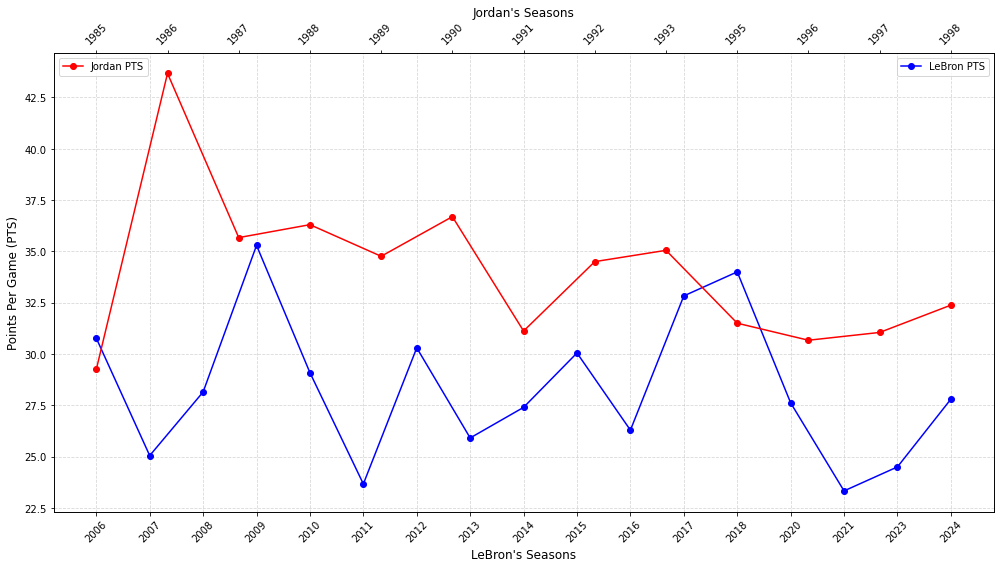

In [92]:
jordan_df = grouped_by_year_playoff_stats.loc[:12]
lebron_df = grouped_by_year_playoff_stats.loc[12+1:]

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(lebron_df['Year'], lebron_df['PTS'], marker='o', color='blue', label="LeBron PTS")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Points Per Game (PTS)", fontsize=12)


ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)

ax2 = ax1.twiny()

ax2.plot(jordan_df['Year'], jordan_df['PTS'], marker='o', color='red', label="Jordan PTS")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)

ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)

ax1.grid(True, linestyle='--', alpha=0.5)

ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()


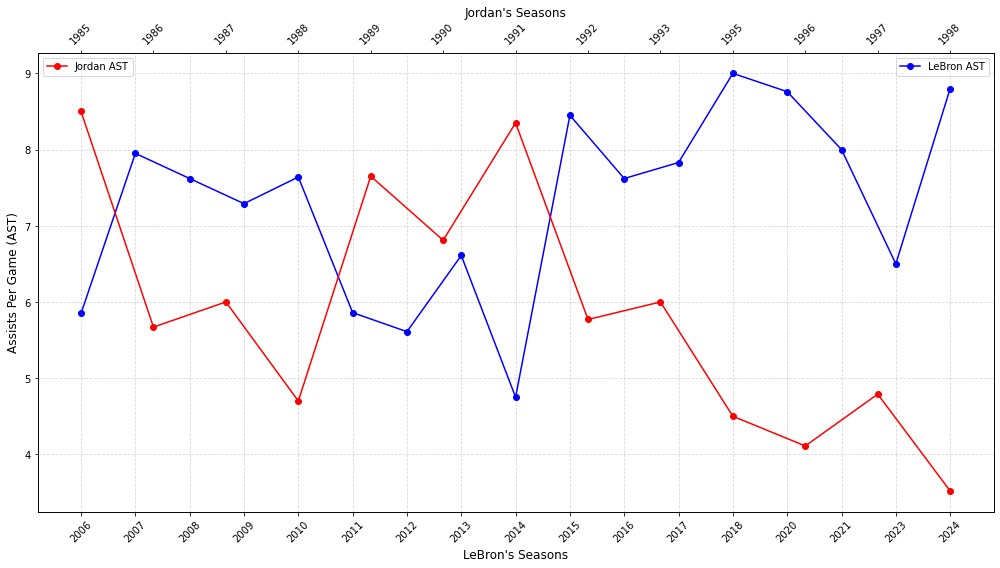

In [93]:

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(lebron_df['Year'], lebron_df['AST'], marker='o', color='blue', label="LeBron AST")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Assists Per Game (AST)", fontsize=12)

ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)

ax2 = ax1.twiny()

ax2.plot(jordan_df['Year'], jordan_df['AST'], marker='o', color='red', label="Jordan AST")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)

ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)

ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()

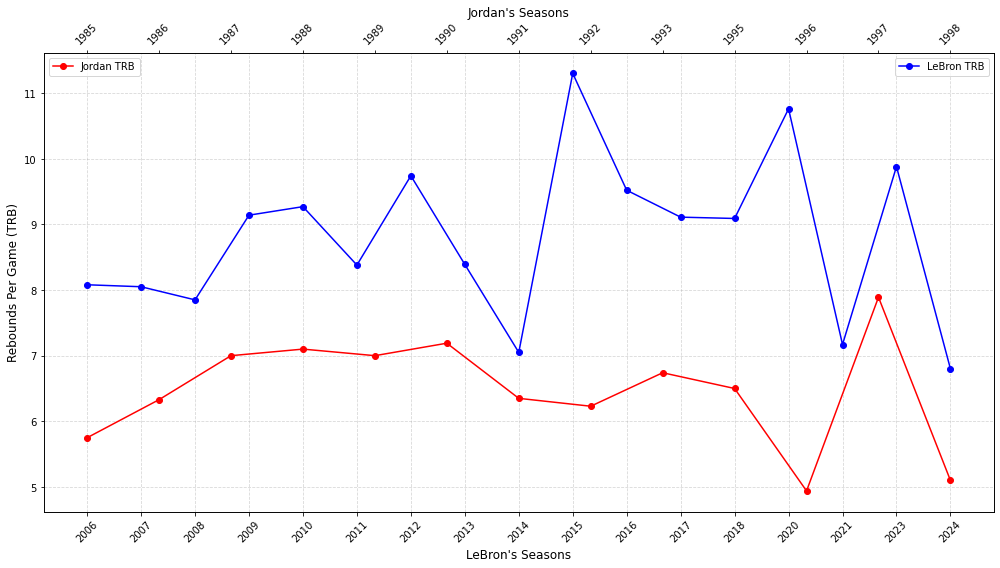

In [94]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(lebron_df['Year'], lebron_df['TRB'], marker='o', color='blue', label="LeBron TRB")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Rebounds Per Game (TRB)", fontsize=12)

ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)

ax2 = ax1.twiny()

ax2.plot(jordan_df['Year'], jordan_df['TRB'], marker='o', color='red', label="Jordan TRB")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)

ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)

ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

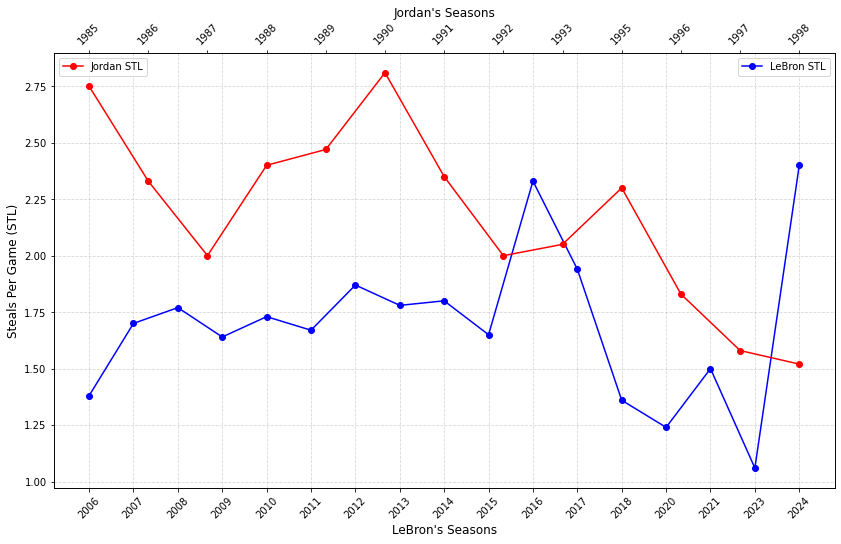

In [99]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(lebron_df['Year'], lebron_df['STL'], marker='o', color='blue', label="LeBron STL")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Steals Per Game (STL)", fontsize=12)

ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)

ax2 = ax1.twiny()

ax2.plot(jordan_df['Year'], jordan_df['STL'], marker='o', color='red', label="Jordan STL")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)

ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)

ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

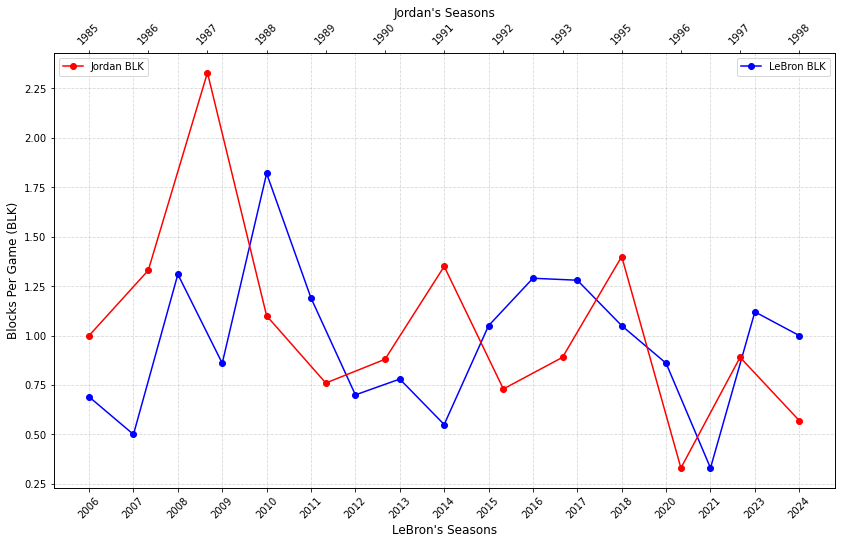

In [100]:
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(lebron_df['Year'], lebron_df['BLK'], marker='o', color='blue', label="LeBron BLK")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Blocks Per Game (BLK)", fontsize=12)
ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)
ax2 = ax1.twiny()
ax2.plot(jordan_df['Year'], jordan_df['BLK'], marker='o', color='red', label="Jordan BLK")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)
ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.tight_layout

In [140]:
# Add team playoff stats
team_playoff_stats = pd.read_excel("data_files/Team Playoff Stats.xlsx")
team_playoff_stats_trimmed = team_playoff_stats[["Year", "PTS", "AST", "TRB", "STL", "BLK"]]
team_playoff_stats_trimmed = team_playoff_stats_trimmed.rename(columns={'PTS': 'Team PTS','AST': 'Team AST','TRB': 'Team TRB','STL': 'Team STL','BLK': 'Team BLK',})
team_playoff_stats_trimmed[["Year"]] = team_playoff_stats_trimmed[["Year"]].astype(int).astype(str)
team_playoff_stats_trimmed.head()

,Year,Team PTS,Team AST,Team TRB,Team STL,Team BLK
0,1985,105.3,20.0,38.8,10.0,4.8
1,1986,113.0,17.0,39.7,8.0,3.7
2,1987,98.0,21.3,38.0,5.7,4.3
3,1988,94.8,23.4,43.0,7.1,4.0
4,1989,99.6,23.5,41.2,7.8,4.2


In [141]:
# Join player and team stats table 
joined_stats = team_playoff_stats_trimmed.join(grouped_by_year_playoff_stats.set_index('Year'), on='Year')



In [142]:
# Similar to 2a. create coeffcient by dividing player stats to league stats
joined_stats[['Pt_coeff', 'Ast_coeff', 'Reb_coeff', 'Stl_coeff', 'Blk_coeff']] = \
joined_stats[['PTS', 'AST', 'TRB', 'STL', 'BLK']].div(joined_stats[['Team PTS', 'Team AST', 'Team TRB', 'Team STL', 'Team BLK']].values).round(2)
joined_stats = joined_stats.dropna()

In [143]:
joined_stats

,Year,Team PTS,Team AST,Team TRB,Team STL,Team BLK,PTS,AST,TRB,STL,BLK,Pt_coeff,Ast_coeff,Reb_coeff,Stl_coeff,Blk_coeff
0,1985,105.3,20.0,38.8,10.0,4.8,29.25,8.50,5.75,2.75,1.00,0.28,0.42,0.15,0.28,0.21
1,1986,113.0,17.0,39.7,8.0,3.7,43.67,5.67,6.33,2.33,1.33,0.39,0.33,0.16,0.29,0.36
2,1987,98.0,21.3,38.0,5.7,4.3,35.67,6.00,7.00,2.00,2.33,0.36,0.28,0.18,0.35,0.54
3,1988,94.8,23.4,43.0,7.1,4.0,36.30,4.70,7.10,2.40,1.10,0.38,0.20,0.17,0.34,0.28
4,1989,99.6,23.5,41.2,7.8,4.2,34.76,7.65,7.00,2.47,0.76,0.35,0.33,0.17,0.32,0.18
5,1990,101.9,22.8,40.1,8.6,4.3,36.69,6.81,7.19,2.81,0.88,0.36,0.30,0.18,0.33,0.20
6,1991,103.9,25.5,40.2,9.5,4.5,31.12,8.35,6.35,2.35,1.35,0.30,0.33,0.16,0.25,0.30
7,1992,100.4,24.1,39.9,7.8,5.5,34.50,5.77,6.23,2.00,0.73,0.34,0.24,0.16,0.26,0.13
8,1993,102.4,24.3,40.0,8.6,4.4,35.05,6.00,6.74,2.05,0.89,0.34,0.25,0.17,0.24,0.20
10,1995,98.4,23.9,39.2,7.6,4.2,31.50,4.50,6.50,2.30,1.40,0.32,0.19,0.17,0.30,0.33


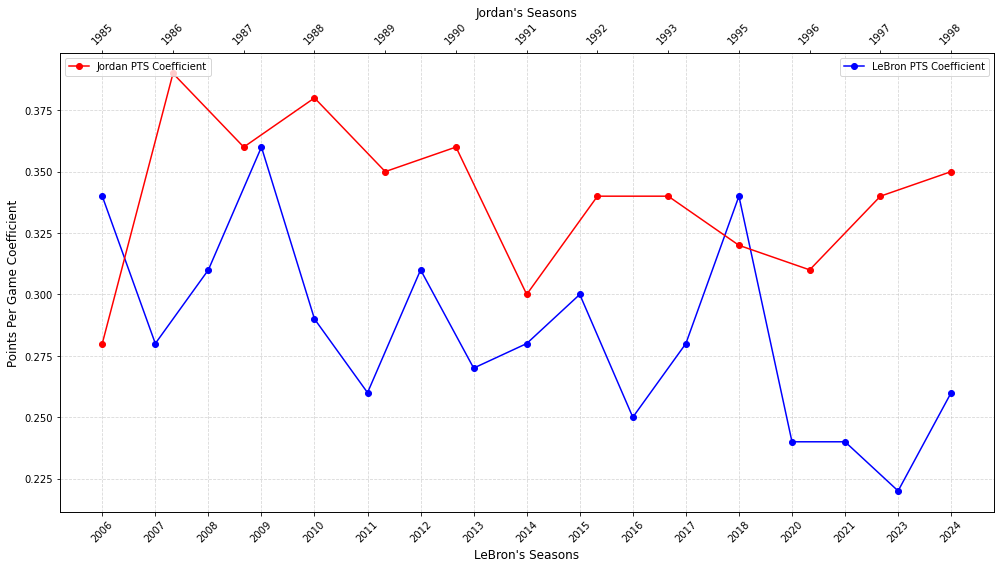

In [146]:
jordan_df = joined_stats.loc[:13]
lebron_df = joined_stats.loc[13+1:]

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(lebron_df['Year'], lebron_df['Pt_coeff'], marker='o', color='blue', label="LeBron PTS Coefficient")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Points Per Game Coefficient", fontsize=12)
ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)
ax2 = ax1.twiny()
ax2.plot(jordan_df['Year'], jordan_df['Pt_coeff'], marker='o', color='red', label="Jordan PTS Coefficient")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)
ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
plt.tight_layout()
plt.show()




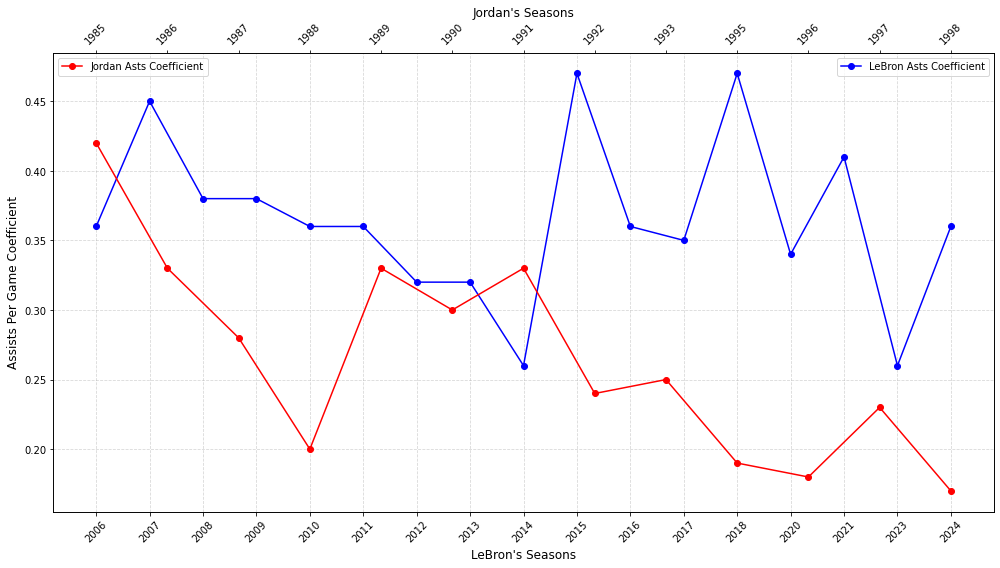

In [147]:

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(lebron_df['Year'], lebron_df['Ast_coeff'], marker='o', color='blue', label="LeBron Asts Coefficient")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Assists Per Game Coefficient", fontsize=12)
ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)
ax2 = ax1.twiny()
ax2.plot(jordan_df['Year'], jordan_df['Ast_coeff'], marker='o', color='red', label="Jordan Asts Coefficient")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)
ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
plt.tight_layout()
plt.show()


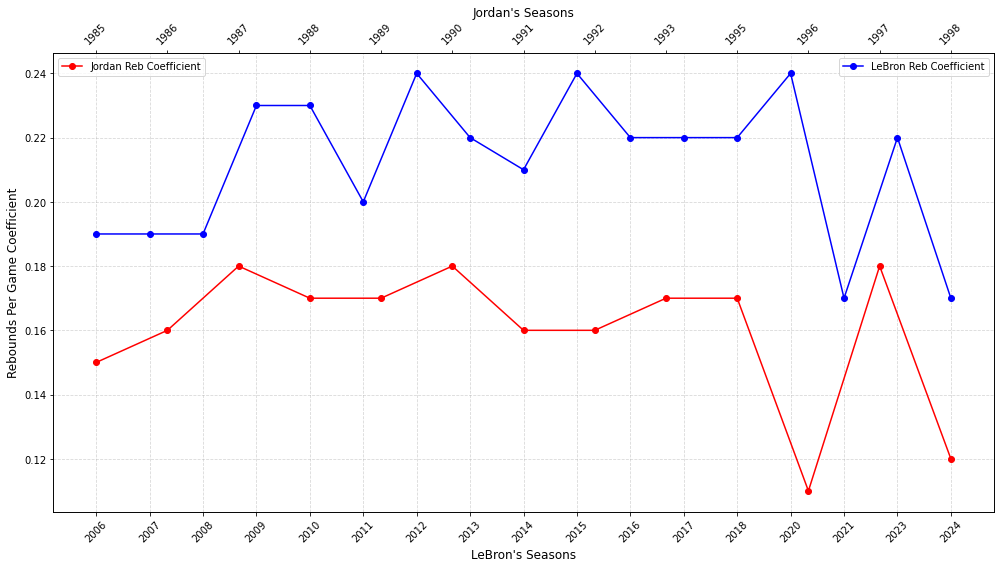

In [148]:

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(lebron_df['Year'], lebron_df['Reb_coeff'], marker='o', color='blue', label="LeBron Reb Coefficient")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Rebounds Per Game Coefficient", fontsize=12)
ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)
ax2 = ax1.twiny()
ax2.plot(jordan_df['Year'], jordan_df['Reb_coeff'], marker='o', color='red', label="Jordan Reb Coefficient")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)
ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

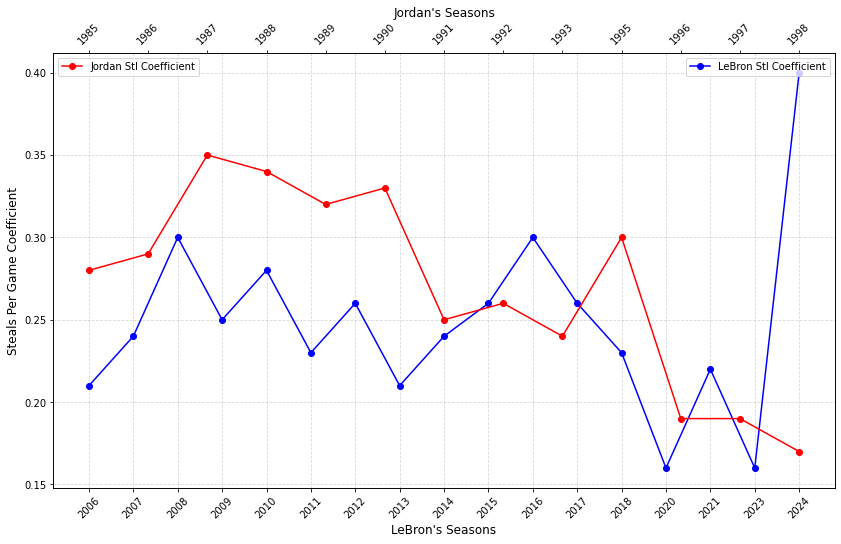

In [150]:

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(lebron_df['Year'], lebron_df['Stl_coeff'], marker='o', color='blue', label="LeBron Stl Coefficient")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Steals Per Game Coefficient", fontsize=12)
ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)
ax2 = ax1.twiny()
ax2.plot(jordan_df['Year'], jordan_df['Stl_coeff'], marker='o', color='red', label="Jordan Stl Coefficient")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)
ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

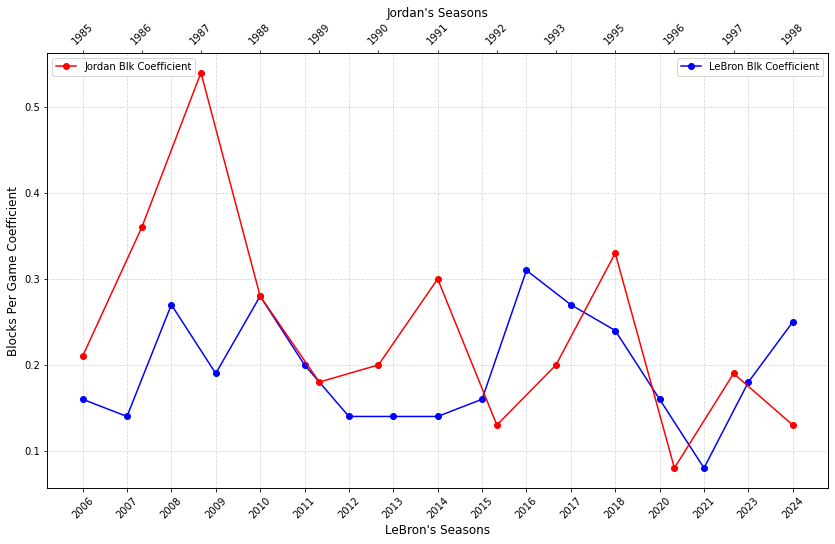

In [152]:

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(lebron_df['Year'], lebron_df['Blk_coeff'], marker='o', color='blue', label="LeBron Blk Coefficient")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Blocks Per Game Coefficient", fontsize=12)
ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)
ax2 = ax1.twiny()
ax2.plot(jordan_df['Year'], jordan_df['Blk_coeff'], marker='o', color='red', label="Jordan Blk Coefficient")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)
ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
plt.tight_layout